# Heart Attack Predicition - Finding the Best Predictive Model

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Life Expectancy](#predict)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Below is data collection and wrangling.

Data will be explored in this [Tableau chart](https://public.tableau.com/views/HeartAttackAnalysis_17120977864890/Sheet1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link).

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Description of Data
<ul>
    <li><strong>age</strong> - Age of the person.</li>
    <li><strong>sex</strong> - Gender of the person.</li>
    <li><strong>cp</strong> - Chest Pain type.</li>
    <ul>
        <li><strong>0</strong> - typical angina</li>
        <li><strong>1</strong> - atypical angina</li>
        <li><strong>2</strong> - non-anginal pain</li>
        <li><strong>3</strong> - asymptomatic</li>
    </ul>
    <li><strong>trtbps</strong> - resting blood pressure (in mm Hg).</li>
    <li><strong>chol</strong> - cholestoral in mg/dl fetched via BMI sensor.</li>
    <li><strong>fbs</strong> - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).</li>
    <li><strong>restecg</strong> - resting electrocardiographic results.</li>
    <li><strong>thalachh</strong> - maximum heart rate achieved.</li>
    <li><strong>exng</strong> - exercise induced angina (1 = yes; 0 = no).</li>
    <li><strong>oldpeak</strong> - Previous peak.</li>
    <li><strong>slp</strong> - Slope.</li>
    <li><strong>caa</strong> - number of major vessels (0-3).</li>
    <li><strong>thall</strong> - Thal rate.</li>
    <li><strong>output</strong> - Target variable.</li>
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for any NULL values.

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Check for duplicates.

In [6]:
df.duplicated().sum()

1

In [7]:
df.shape

(303, 14)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(302, 14)

One-hot encode the 'cp' column.

In [10]:
df = pd.get_dummies(df, columns=['cp'], prefix=['cp'], dtype=int)
df.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


Create the correlation matrix.

In [11]:
correlation_matrix = df.corr()

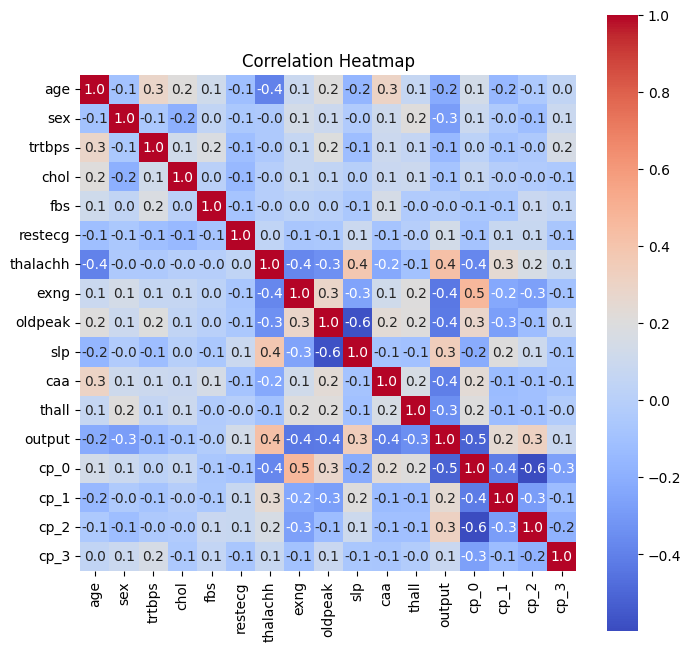

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df.corr()['output'].sort_values(ascending=False)

output      1.000000
thalachh    0.419955
slp         0.343940
cp_2        0.313696
cp_1        0.247649
restecg     0.134874
cp_3        0.087959
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
cp_0       -0.514626
Name: output, dtype: float64

Create input (X) and output (y) data.

In [14]:
X = df.drop(labels=["output"], axis=1)
y = df.output

Split the data into a training, and testing set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

Feature Scaling.

In [16]:
df.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output', 'cp_0', 'cp_1', 'cp_2',
       'cp_3'],
      dtype='object')

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <span style="color:#5E6997">Predict Heart Attacks</span> <a class="anchor" id="predict"></a>

1. Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 4 30]]


The accuracy of Logistic Regression is :  86.88524590163934 %


2. Gaussian Naive Bayes

In [19]:
model = GaussianNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  83.60655737704919 %


3.Bernoulli Naive Bayes

In [20]:
model = BernoulliNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


4. Support Vector Machine

In [21]:
model = SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


5. Random Forest

In [22]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  83.60655737704919 %


6. K Nearest Neighbors

In [23]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[23  4]
 [ 6 28]]
The accuracy of KNN is :  83.60655737704919 %


Text(0, 0.5, 'Error Rate')

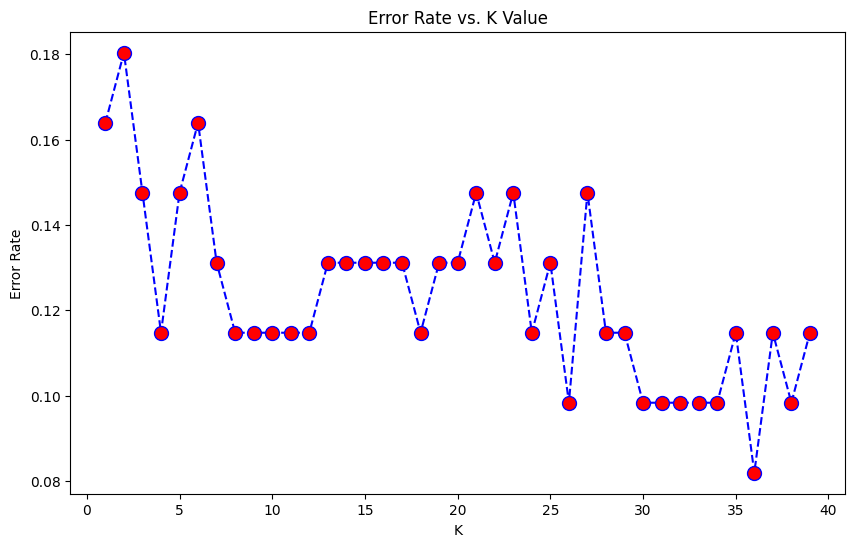

In [24]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
model = KNeighborsClassifier(n_neighbors = 36)
  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[25  2]
 [ 3 31]]


The accuracy of KNN is :  91.80327868852459 %


7. XGBoost

In [26]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
   
predicted = model.predict(X_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  80.32786885245902 %
